<h1 id="punto-1">Punto 1</h1>

## Punto 1.1 <a id="punto-1-1"></a>

In [48]:
import numpy as np
import pandas as pd


df = pd.read_csv(r"../data/raw/casas_dev.csv") 

df.sample(5, random_state=42)


,area,area_units,is_house,has_pool,age,price,lat,lon,rooms
70,872.0,sqft,0,0,11.0,630.0,40.718433,-74.008699,2.0
827,1076.0,sqft,0,0,7.0,772.0,40.707037,-73.998823,3.0
231,137.0,m2,0,0,10.0,214.0,-34.550223,-58.391268,4.0
588,775.0,sqft,1,1,10.0,751.0,40.726223,-74.043929,2.0
39,154.0,m2,1,0,16.0,273.0,-34.563525,-58.347365,4.0


In [49]:

df.describe(include='all')


,area,area_units,is_house,has_pool,age,price,lat,lon,rooms
count,900.000000,900,900.000000,900.000000,770.000000,900.000000,900.000000,900.000000,828.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,m2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,533.598889,NaN,0.418889,0.144444,10.212987,466.197778,1.966225,-65.967203,2.737923
std,502.318230,NaN,0.493651,0.351735,4.773010,347.122903,37.661269,7.813671,0.948574
min,40.000000,NaN,0.000000,0.000000,1.000000,65.000000,-34.686302,-74.058238,1.000000
25%,93.000000,NaN,0.000000,0.000000,6.250000,178.750000,-34.605803,-74.005566,2.000000
50%,164.500000,NaN,0.000000,0.000000,11.000000,323.500000,-34.529704,-58.459293,3.000000
75%,980.000000,NaN,1.000000,0.000000,14.000000,712.500000,40.709819,-58.379873,3.000000


Algo que es particular resaltar es que la feature ```area_units``` no tiene sentido que se mantenga. Podemos realizar una conversión a metros cuadrados, eliminar está feature y agregar ```area``` en metros cuadrados.

Convertimos la feature ```sqft``` a ```m2``` y eliminamos la columna ```area_units```

In [50]:
df.loc[df['area_units'] == 'sqft', 'area'] = df['area'] * 0.092903
df.loc[df['area_units'] == 'sqft', 'area_units'] = 'm2'

df = df.drop('area_units', axis=1)

df.describe(include='all')

,area,is_house,has_pool,age,price,lat,lon,rooms
count,900.000000,900.000000,900.000000,770.000000,900.000000,900.000000,900.000000,828.000000
mean,94.794747,0.418889,0.144444,10.212987,466.197778,1.966225,-65.967203,2.737923
std,30.220560,0.493651,0.351735,4.773010,347.122903,37.661269,7.813671,0.948574
min,40.000000,0.000000,0.000000,1.000000,65.000000,-34.686302,-74.058238,1.000000
25%,74.000000,0.000000,0.000000,6.250000,178.750000,-34.605803,-74.005566,2.000000
50%,92.995903,0.000000,0.000000,11.000000,323.500000,-34.529704,-58.459293,3.000000
75%,111.264314,1.000000,0.000000,14.000000,712.500000,40.709819,-58.379873,3.000000
max,237.000000,1.000000,1.000000,20.000000,1992.000000,40.764550,-58.295919,5.000000


Hacemos un análisis de las features que contienen NaNs.

In [51]:
from utils.data import get_nan_features

nan_features = get_nan_features(df) 


print("Features con valores nulos y su cantidad de valores nulos: ", nan_features.items())


Features con valores nulos y su cantidad de valores nulos:  dict_items([('age', 130), ('rooms', 72)])


Observamos que las features con ```NaNs``` son ```age``` y ```room```.

Obtenemos la distribucion empirica de la feature ```rooms``` y de ```age```

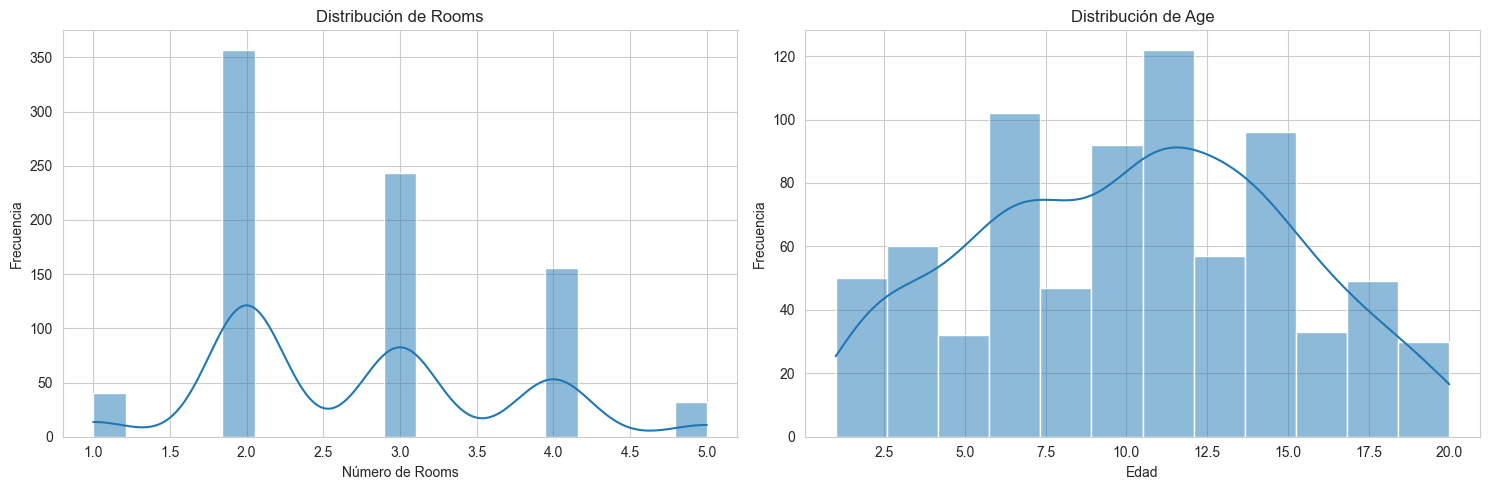

In [52]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['rooms'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Rooms')
axes[0].set_xlabel('Número de Rooms')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['age'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Age')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [53]:
# ver cantidad de filas que se pierden
df.isna().sum().sum()


np.int64(202)

Observamos que la media de ```roooms``` es ```2.737``` y que la media de ```age``` es ```10.212```. Podemos reemplazar en las muestras (filas) que tienen ```NaNs``` con la media. Al reemplazar los valores perdidos (NaNs) con la media, se mantiene la escala original de la variable y se evitan valores atípicos fuera de rango, lo que ayuda a preservar en cierta medida la distribución.

Esto es un proceso válido ya que al reemplazar los ```NaNs``` con la media, a primera vista,la variable conserva su escala original (no se generan valores fuera de rango ni se produce un sesgo), lo que ayuda a mantener la consistencia de la información que aporta esa variable. 

Sin embargo, si en el conjunto de datos existen varios grupos con medias distintas, imputar los valores faltantes con una única media global genera una sobreestimación en los grupos cuya media es menor y una subestimación en aquellos con una media mayor. Esto distorsiona la distribución real de cada subgrupo, lo que puede conducir a conclusiones equivocadas al mezclar la información de todos los grupos en un solo valor (ver inciso 4).

Además, al ignorar las diferencias entre subgrupos, se pierden matices importantes de la variabilidad interna de los datos, lo que introduce un sesgo sistemático. 

Podríamos también eliminar las filas que tienen ```NaNs```, pero esto haría que perdamos 202 filas, opción que optaré por no realizar ya que se pierde bastante información. 

Por último, otra solución sería utilizar un modelo NO LINEAL para predecir estas features, opción que también no realizaré debido a que excede el objetivo de este TP.




In [54]:

features_to_impute = ['rooms', 'age']


for feature in features_to_impute:

    mean_value = df[feature].mean()
    
    df[feature] = df[feature].fillna(mean_value)
    
    print(f'Imputando en {feature} con la media: {mean_value}')
    

print(df.head())

Imputando en rooms con la media: 2.7379227053140096
Imputando en age con la media: 10.212987012987012
         area  is_house  has_pool   age  price        lat        lon  rooms
0   58.993405         1         0  18.0  546.0  40.679064 -74.007844    2.0
1  102.007494         0         0   9.0  759.0  40.712839 -73.967750    3.0
2   61.966301         0         0   7.0  464.0  40.669863 -74.029414    2.0
3  127.000000         1         1  16.0  251.0 -34.600437 -58.415266    4.0
4  128.020334         0         0   8.0  963.0  40.722322 -73.983229    4.0


Guardamos el dataframe en un CSV.

In [55]:
df.to_csv(r"../data/processed/casas_dev.csv", index=False)

## Punto 1.2 <a id="punto-1-2"></a>



<div style="padding: 10px; border-radius: 5px;">
    <p>
        Realice una serie de histogramas y diagramas de dispersión (scatterplots) para mostrar
        la relación entre las variables. Para esto, es útil el comando <code>pairplot</code>. 
        ¿Qué conclusiones puede extraer a simple vista acerca de las relaciones entre las variables? 
        Se permite la creación de gráficos adicionales que considere relevantes.
    </p>
</div>


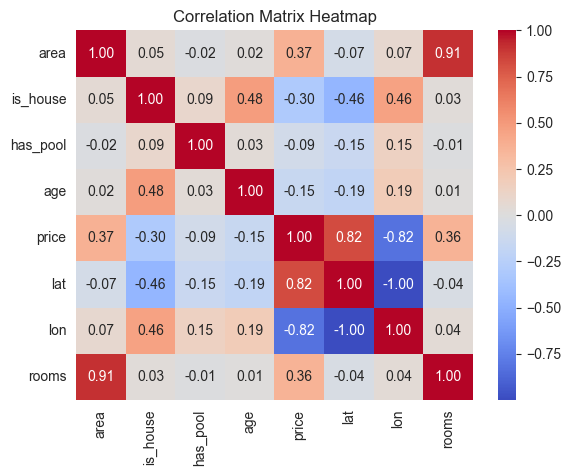

,area,is_house,has_pool,age,price,lat,lon,rooms
area,1.000000,0.047767,-0.020012,0.020607,0.371862,-0.071974,0.071787,0.907964
is_house,0.047767,1.000000,0.093175,0.482947,-0.298412,-0.459865,0.459664,0.029574
has_pool,-0.020012,0.093175,1.000000,0.033317,-0.088624,-0.146234,0.146399,-0.007955
age,0.020607,0.482947,0.033317,1.000000,-0.149007,-0.194795,0.194773,0.013094
price,0.371862,-0.298412,-0.088624,-0.149007,1.000000,0.822490,-0.822537,0.359635
lat,-0.071974,-0.459865,-0.146234,-0.194795,0.822490,1.000000,-0.999992,-0.040040
lon,0.071787,0.459664,0.146399,0.194773,-0.822537,-0.999992,1.000000,0.039892
rooms,0.907964,0.029574,-0.007955,0.013094,0.359635,-0.040040,0.039892,1.000000


In [56]:
import seaborn as sns 


corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

corr

Observamos que la variable **area** presenta una correlación muy alta de 0.91 con **rooms**, lo que es totalmente coherente, ya que a medida que aumenta la cantidad de habitaciones, la superficie total de la propiedad tiende a crecer. Además, la **latitud (lat)** muestra una fuerte correlación positiva de 0.82 con **price**, lo que sugiere que las propiedades ubicadas en zonas con mayor latitud tienden a tener precios más altos; en contraposición, la **longitud (lon)** tiene una correlación negativa de -0.82 con **price**, lo que indica que en las áreas donde la longitud es mayor, los precios son más bajos. Esto podría interpretarse como que existen zonas geográficas diferenciadas, donde la posición en el mapa influye significativamente en el valor de la propiedad. 

Por otro lado, se observa una correlación moderada de 0.48 entre **is_house** y **age**, lo que sugiere que las casas (frente a otros tipos de propiedades) tienden a ser más antiguas. Asimismo, **is_house** se relaciona moderadamente con las coordenadas: presenta una correlación de -0.46 con **lat** y de 0.46 con **lon**, lo que puede indicar que las casas se concentran en áreas geográficas específicas distintas a aquellas de otros inmuebles. 

Finalmente, resulta destacable la 'perfecta' correlación negativa de -1.0 entre **lat** y **lon**, lo que implica que, dentro del rango de datos, a medida que aumenta la latitud, la longitud disminuye de forma casi lineal, reflejando probablemente una distribución geográfica particular de las propiedades. Estos patrones nos ayudan a entender que la ubicación y el tipo de inmueble son determinantes importantes en la configuración del precio y otras características de las viviendas en el dataset. Incluso podríamos clasificar las casas por zonas (clusters) en base a la latitud y longitud <details>
<summary>Spoiler alert</summary>
lo hago en el inciso 4)
</details>

En el siguiente gráfico se observan en mayor detalle las relaciones entre las variables.

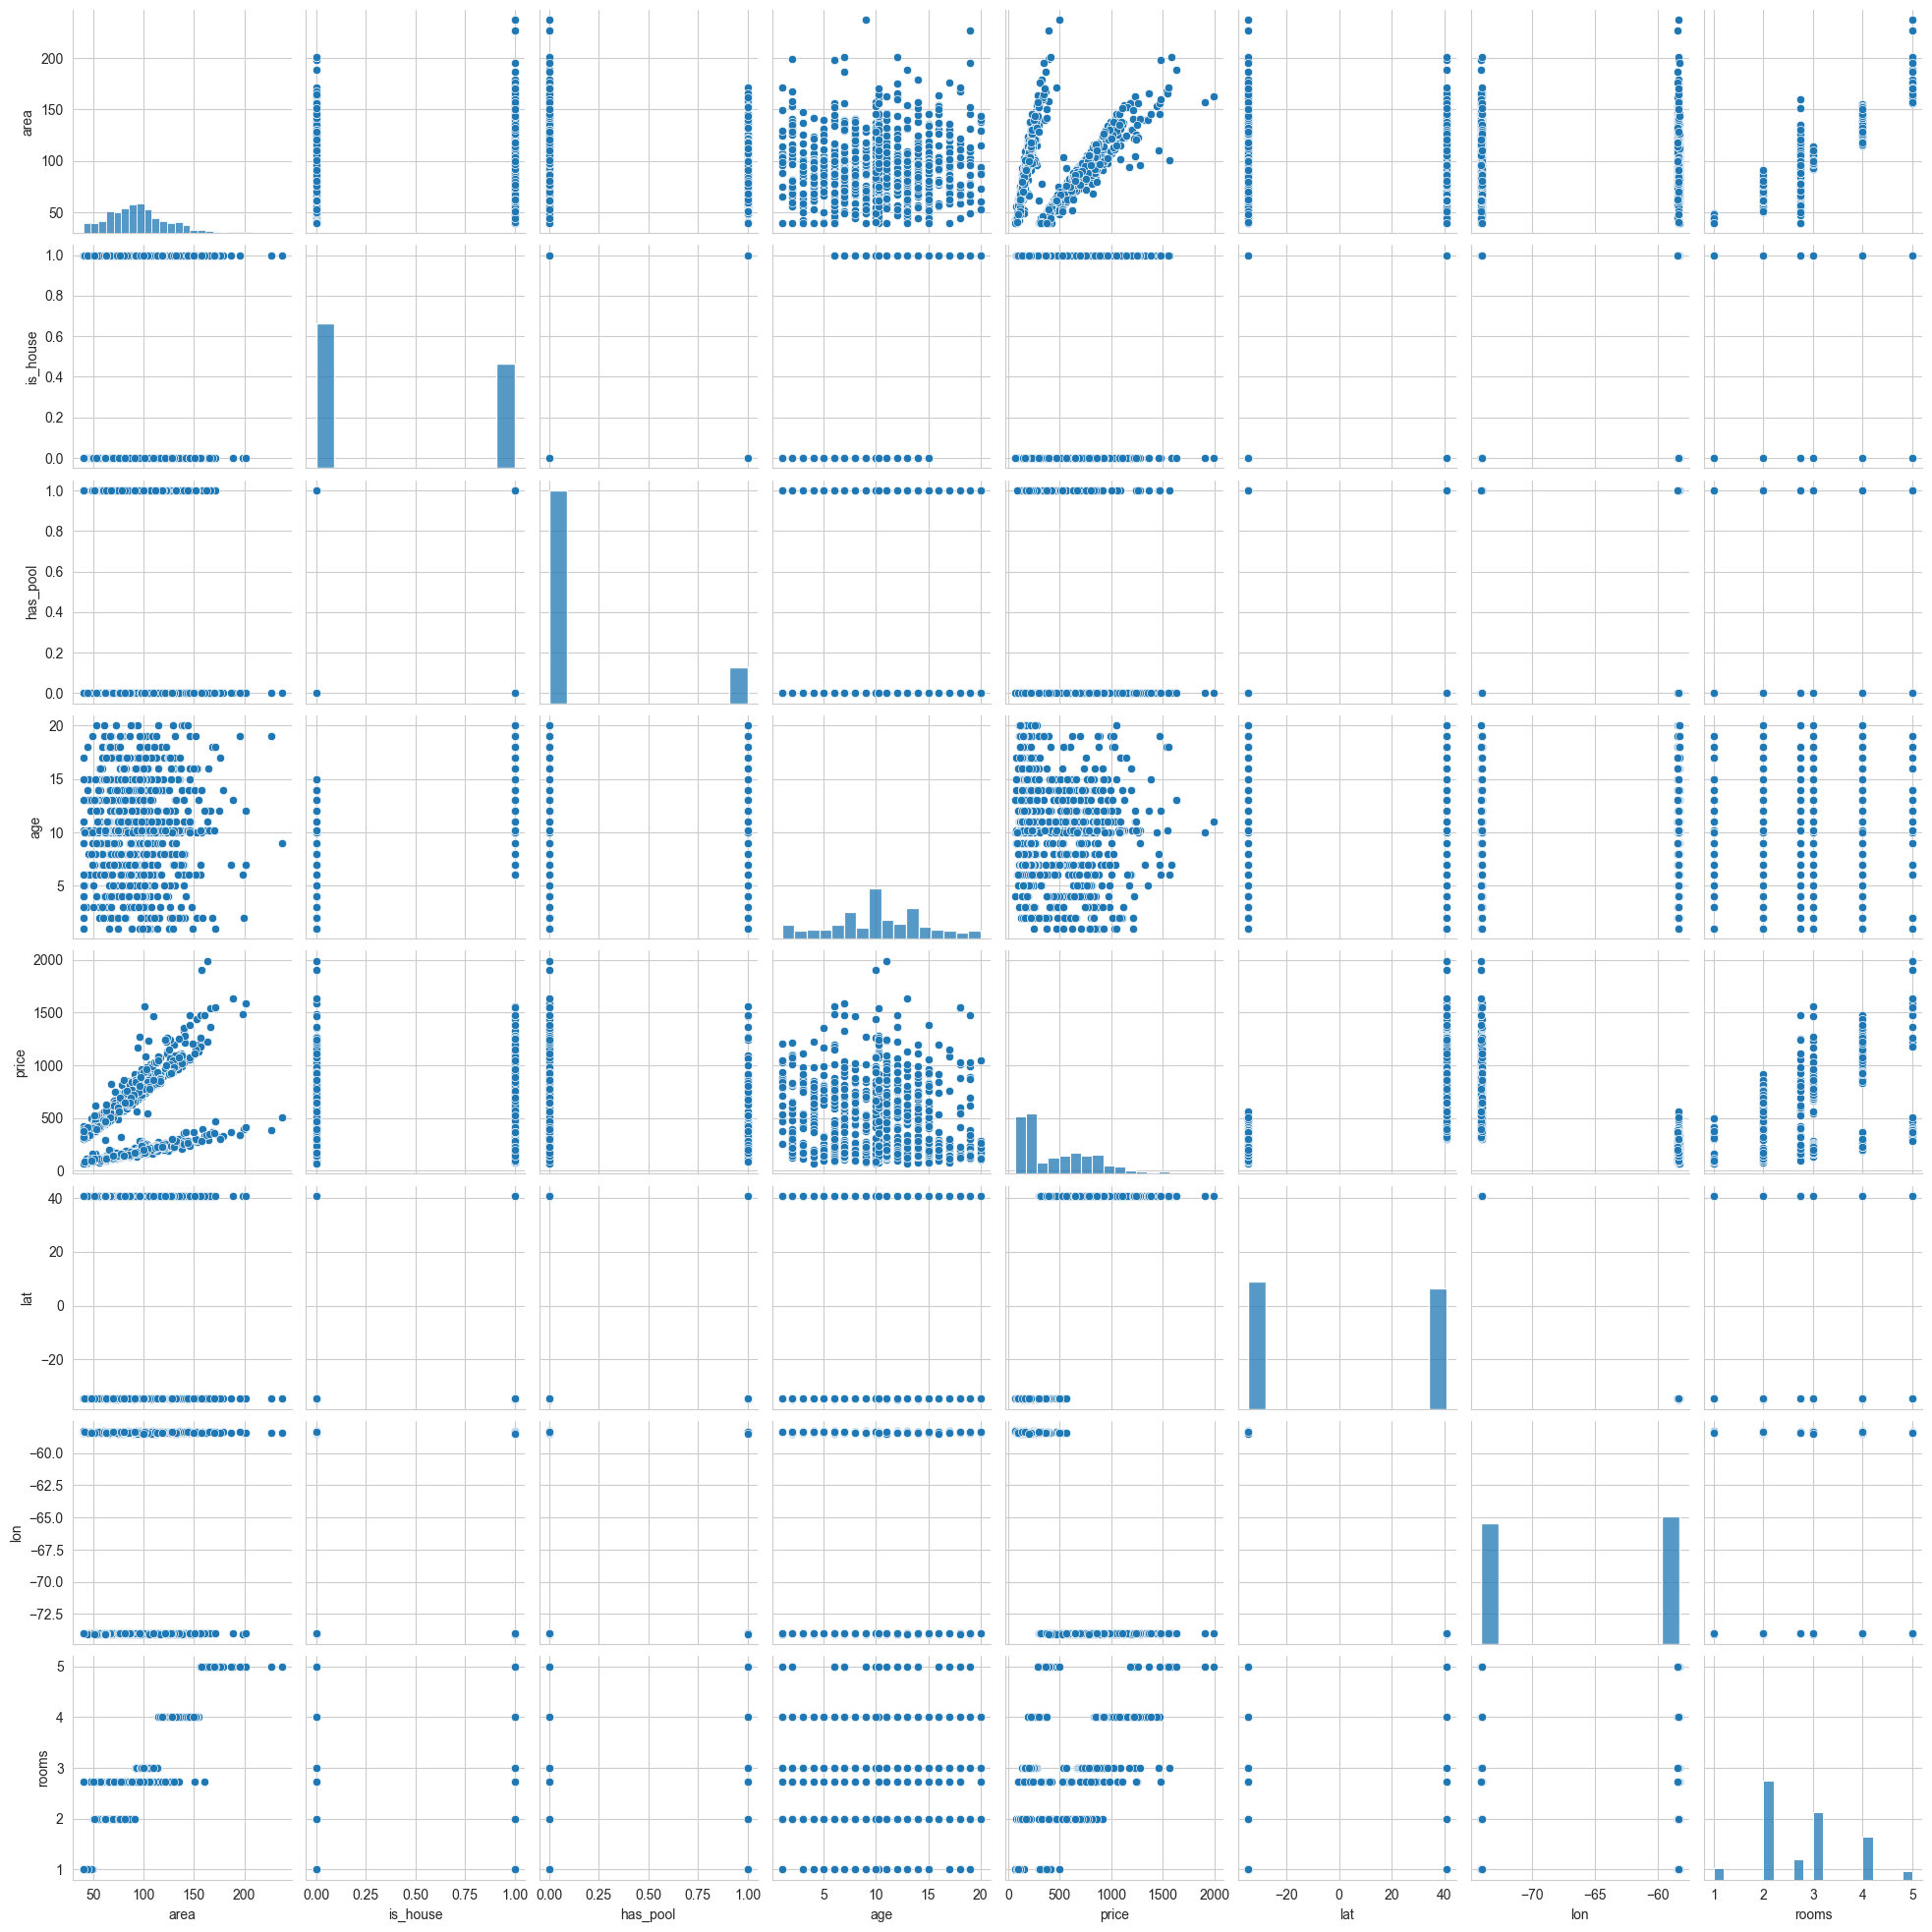

In [57]:
sns.pairplot(df)
plt.show()

Observamos en los gráficos de latitud y longitud como estan estrictamente correlacionados con una pendiente negativa. Parece haber 2 clusters en el mismo, caracteristica que explotaremos en el inciso 4. 

Por otro lado, en el grafico de area vs price notamos una correlacion positiva, lo que indicaria que a mayor area mayor es el precio, algo que es relativamente logico. Similarmente se nota este patron en el grafico de rooms vs price y rooms vs area.

Tambien notamos una correlacion positiva (como ya mencioné) entre latitud vs price, dandonos un indicador que ciertas zonas tienden a incrementar el valor de los inmuebles, mientras que la longitud vs price tiene una correlacion negativa, indicandonos que ciertas zonas tienden a disminuir el valor de los inmuebles.

Por ultimo, notamos como, si el inmubele es una casa, tiende a tener mayor edad que aquellos que no son casa. 



## Punto 1.3 <a id="punto-1-3"></a>


In [58]:
from utils.data import split_test_train_with_label

df = pd.read_csv(r"../data/processed/casas_dev.csv")

X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = split_test_train_with_label(X, y, test_size=0.2, random_state=12,normalize=True)


# Punto 2

### Todas las features (menos price)

#### Pseudo Inversa

In [59]:
from utils.model import train_and_evaluate_model
from models.regression.linear_regressor import LinearRegressor
from utils.data import mse_score, r2_score


results_linear_psinv_all = train_and_evaluate_model( 
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    transform_target=None,
    model_class=LinearRegressor,
    normalize_features=False,
    fit_params={'method': "pseudo_inverse",
                "loss": "mse"},
    metrics=[mse_score, r2_score]
)

model_linear_psinv_all = results_linear_psinv_all["model"]



=== Model Evaluation (LinearRegressor) - MSE Space: original ===
mse: 11630.160150
r2: 0.904712
Método: pseudo_inverse
Intercept: 3677.5350

Coeficientes:
------------------------------
area            | +4.9952
is_house        | +75.3474
has_pool        | +43.4141
age             | -3.4354
lat             | +19.9893
lon             | +56.3301
rooms           | -3.9214


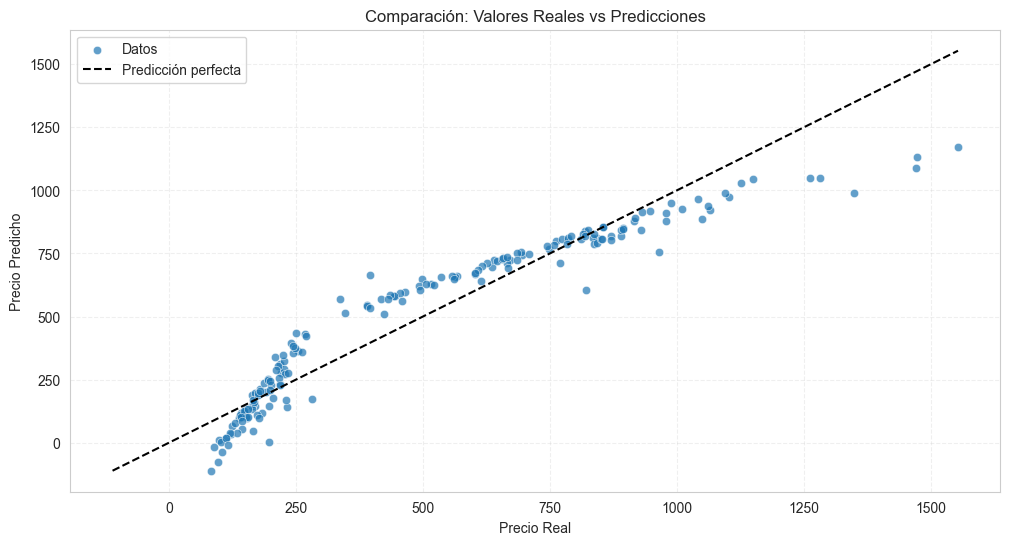

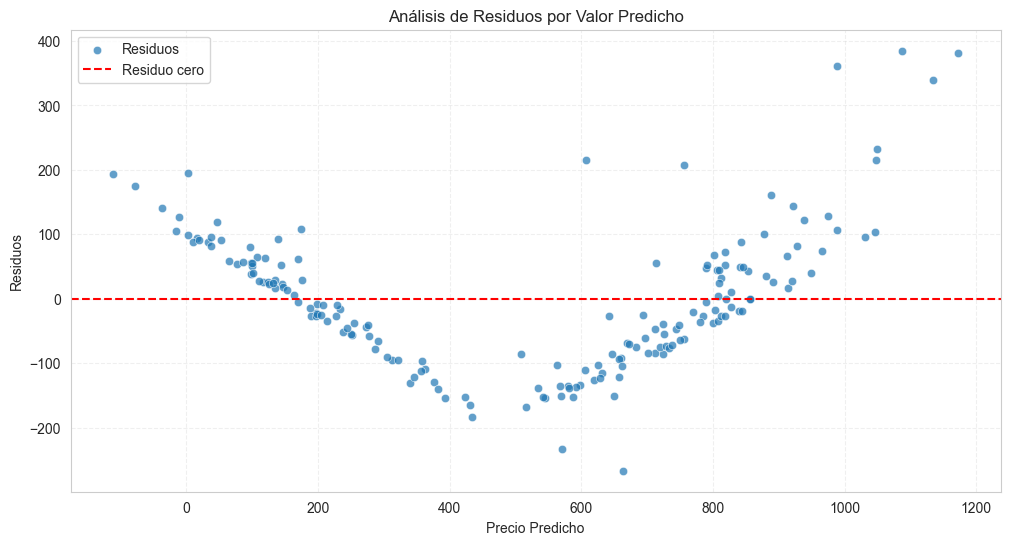

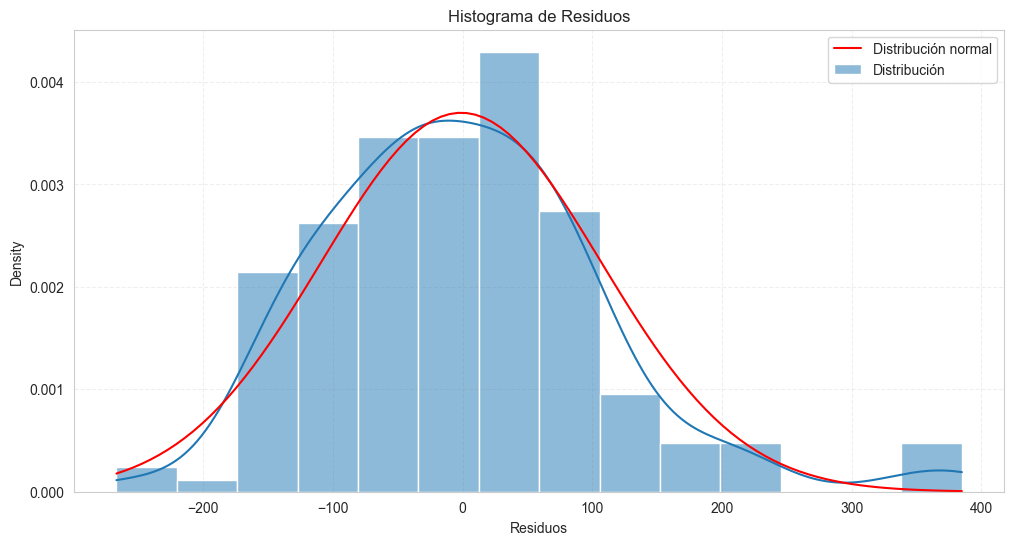

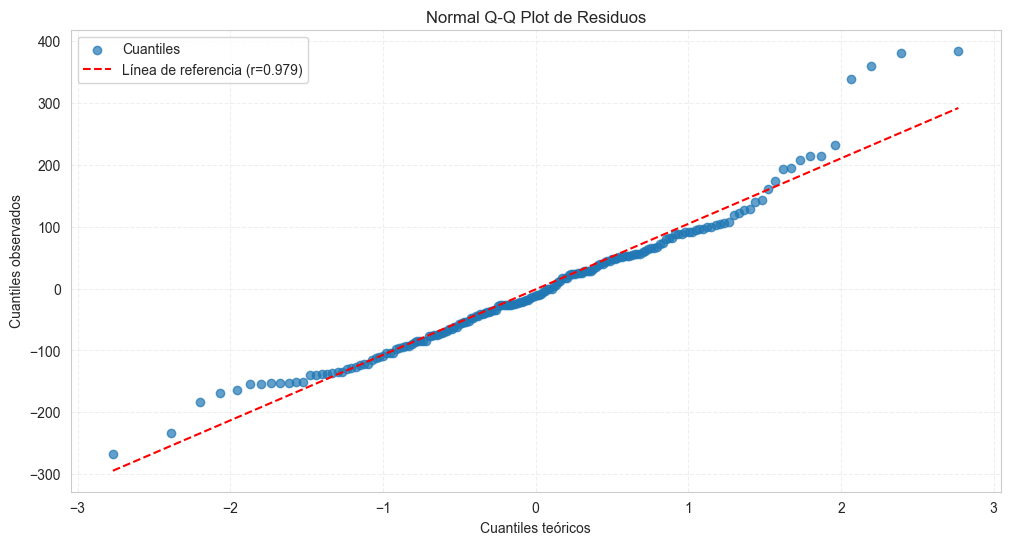

In [60]:
from utils.visuals import visualize_regression_results

custom_titles = {
    "scatter": "Comparación: Valores Reales vs Predicciones",
    "residuals": "Análisis de Residuos por Valor Predicho",
    "distribution": "Histograma de Residuos"
}


figures_linear_psinv_all = visualize_regression_results(
    results_linear_psinv_all['y_test'],
    results_linear_psinv_all['y_pred_test'],
    transform_func=None,
    fig_size=(12, 6),
    titles=custom_titles,
    show_figures=True
)



Los gráficos muestran en primer lugar, en el diagrama de valores predichos vs. residuos, que la varianza de los errores no se mantiene constante a lo largo de todo el rango de valores y se observa cierta curvatura empinada que sugiere una relación no capturada por el modelo o heterocedasticidad. Al mismo tiempo, el Q-Q plot (asumiendo una distribución normal) indica que, en general, los residuos se aproximan a la distribución normal, aunque se aprecian leves desvíos que podría deberse a la presencia de outliers. Estos, junto con el histograma de residuos, nos indica que el modelo tiene errores de predicción que no son constantes a lo largo de todo el rango de valores (ya que si el modelo fuera bueno, los residuos deberian estar distribuidos de manera uniforme alrededor de cero).

Conviene revisar si el modelo está capturando adecuadamente la forma funcional de las variables, por ejemplo, incluyendo términos polinómicos (guess what: inciso 4) o interacciones en caso de relaciones no lineales. Ridge o Lasso pueden ayudar si hay multicolinealidad o sobreajuste, ya que estabilizan los coeficientes y reducen la varianza de las estimaciones, pero no resuelven de manera directa la heterocedasticidad. 

#### Gradient Descent

In [61]:
from utils.model import train_and_evaluate_model
from models.regression.linear_regressor import LinearRegressor
from utils.data import mse_score, r2_score

results_gd_linear_all = train_and_evaluate_model(
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=True,
    fit_params={'method': 'gradient_descent',
                "epochs": 1000,
                "learning_rate":0.01
                },
    metrics=[mse_score, r2_score]
)

model_gd_linear_all = results_gd_linear_all["model"]



=== Model Evaluation (LinearRegressor) - MSE Space: original ===
mse: 11654.140146
r2: 0.904515
Método: gradient_descent
Intercept: 455.7167

Coeficientes:
------------------------------
area            | +139.8104
is_house        | +37.2665
has_pool        | +15.0462
age             | -14.7437
lat             | +155.9551
lon             | -155.8073
rooms           | +10.0213
Convergencia: Sí
Iteraciones: 1000/1000


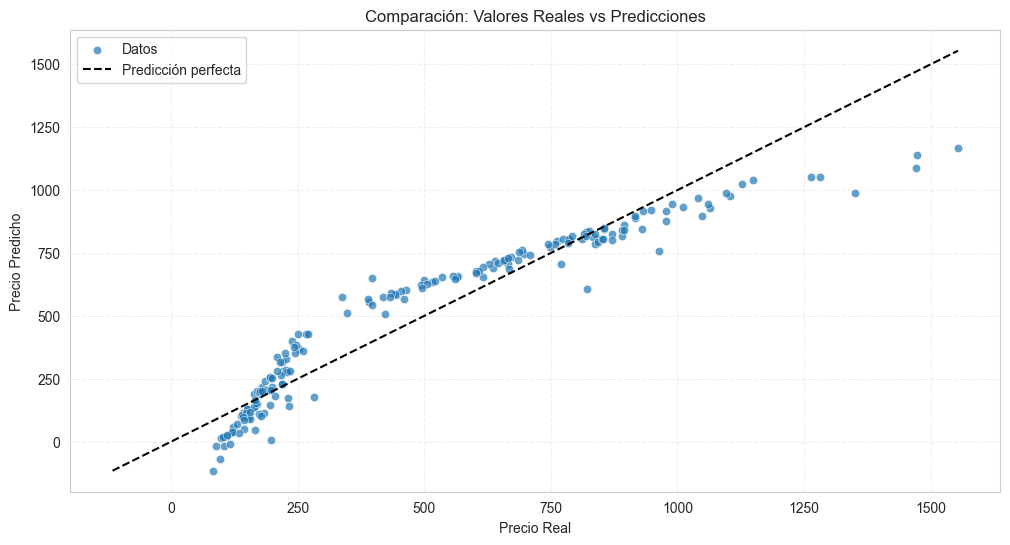

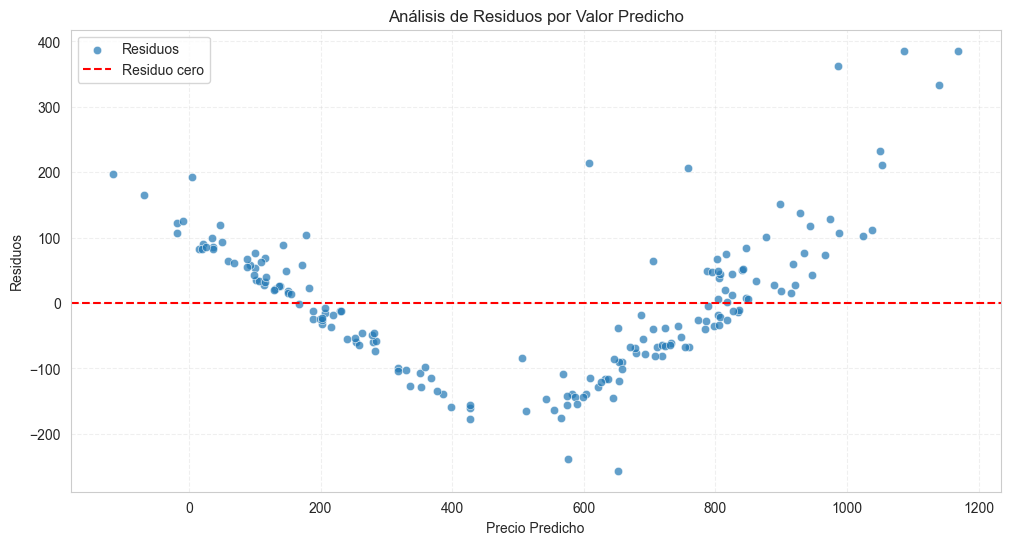

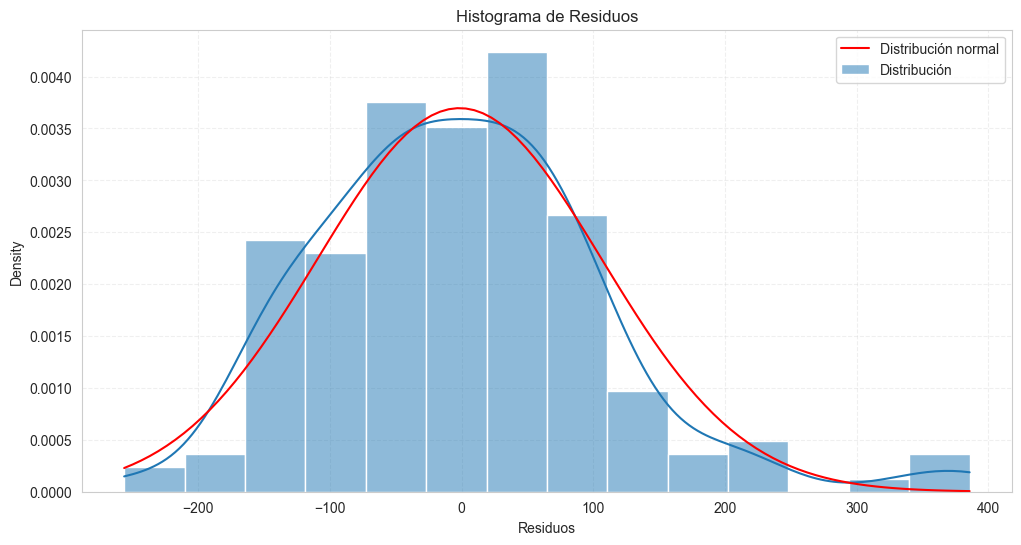

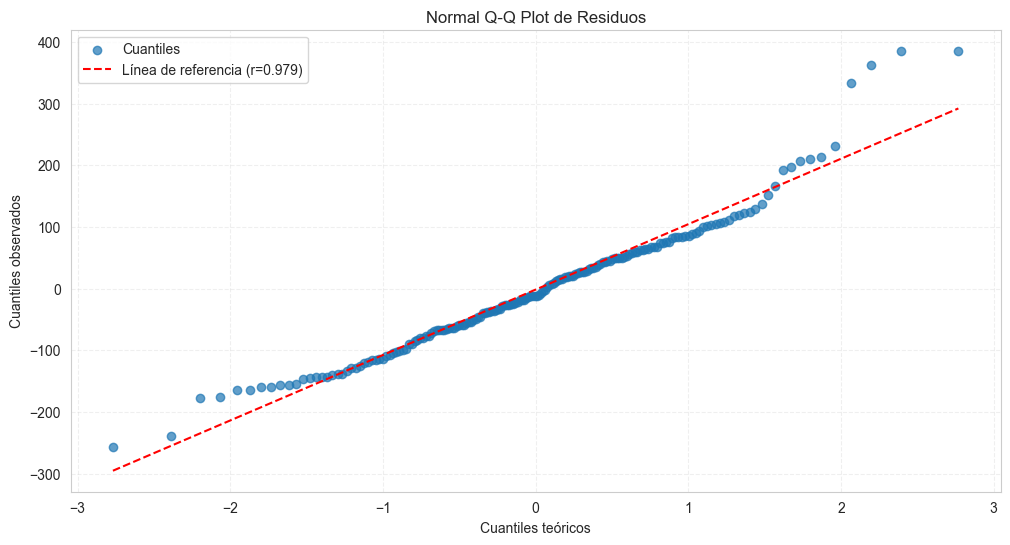

In [62]:
from utils.visuals import visualize_regression_results

custom_titles = {
    "scatter": "Comparación: Valores Reales vs Predicciones",
    "residuals": "Análisis de Residuos por Valor Predicho",
    "distribution": "Histograma de Residuos"
}

figures = visualize_regression_results(
    results_gd_linear_all['y_test'],
    results_gd_linear_all['y_pred_test'],
    transform_func=None,
    fig_size=(12, 6),
    titles=custom_titles,
    show_figures=True,
    fit_degree=1
)





Mismo análisis de heterocedasticidad y distribución de residuos que el anterior.

### Probamos que el modelo con 1 feature funciona bien


Pseudo Inversa

In [63]:
from utils.model import train_and_evaluate_model
from utils.data import mse_score, r2_score

results_linear_psinv_area = train_and_evaluate_model( 
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["area"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score]
)

model_linear_psinv_area = results_linear_psinv_area["model"]


=== Model Evaluation (LinearRegressor) - MSE Space: original ===
mse: 102728.297632
r2: 0.158327
Método: pseudo_inverse
Intercept: 75.5102

Coeficientes:
------------------------------
area            | +4.0167


Gradient descent


In [64]:
from utils.model import train_and_evaluate_model
from utils.data import mse_score, r2_score

results_gd_linear_area = train_and_evaluate_model( 
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    feature_columns = ["area"],
    normalize_features=True,
    fit_params={'method': 'gradient_descent',
                "epochs": 1000,
                "learning_rate":0.01
                },
    metrics=[mse_score, r2_score],
    verbose=True
)

model_gd_linear_area = results_gd_linear_area["model"]

results_gd_linear_area["normalization_params"]



=== Model Evaluation (LinearRegressor) - MSE Space: original ===
mse: 102728.866581
r2: 0.158322
Método: gradient_descent
Intercept: 455.7119

Coeficientes:
------------------------------
area            | +123.4822
Convergencia: Sí
Iteraciones: 569/1000


{'mean': area    94.657096
 dtype: float64,
 'std': area    30.742739
 dtype: float64}

# Punto 3

## Punto 3.1

In [65]:
from utils.model import train_and_evaluate_model
from utils.data import mse_score, r2_score

df = pd.read_csv(r"../data/processed/casas_dev.csv")

results_amanda = train_and_evaluate_model( 
    df = df,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["area"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

model_amanda = results_amanda["model"]



### Punto 3.2

#### preparamos el set de Amanda

In [66]:
import pandas as pd

df_amanda = pd.read_csv(r"../vivienda_Amanda.csv")

df_amanda.loc[df_amanda['area_units'] == 'sqft', 'area'] = df_amanda['area'] * 0.092903
df_amanda['area_units'] = 'm2'  

df_amanda = df_amanda.drop('area_units', axis=1)



In [67]:
from utils.model import train_and_evaluate_model
from models.regression.linear_regressor import LinearRegressor

results_amanda = train_and_evaluate_model( # agarro todas las features
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    transform_target=None,
    model_class=LinearRegressor,
    normalize_features=False,
    fit_params={'method': "pseudo_inverse",
                "loss": "mse"},
    metrics=[mse_score, r2_score]
)

model_amanda = results_amanda["model"]



=== Model Evaluation (LinearRegressor) - MSE Space: original ===
mse: 11630.160150
r2: 0.904712
Método: pseudo_inverse
Intercept: 3677.5350

Coeficientes:
------------------------------
area            | +4.9952
is_house        | +75.3474
has_pool        | +43.4141
age             | -3.4354
lat             | +19.9893
lon             | +56.3301
rooms           | -3.9214


In [68]:
y_pred = model_amanda.predict(df_amanda)

print(f"Valor estimado de la vivienda de Amanda: {y_pred[0]:.2f}")

Valor estimado de la vivienda de Amanda: 791.19


### Punto 3.3

3.3) En el dataset, ¿cuál es el valor promedio por metro cuadrado de una casa

In [69]:
from utils.model import train_and_evaluate_model

df_area = pd.read_csv(r"../data/processed/casas_dev.csv")
df_area = df_area[df_area["is_house"] == 1]

results_area = train_and_evaluate_model( 
    df = df_area,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["area"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

model_area = results_area["model"]


area_cof = model_area.get_coef_dict()["area"]

print(f"El valor promedio por metro cuadrado de una casa es: {area_cof:.2f}")

El valor promedio por metro cuadrado de una casa es: 3.64


### Punto 3.4

Benito está evaluando la posibilidad de construir una pileta. ¿Cómo afectaría la construcción de una pileta al precio de su propiedad? Explique cómo llegó a este resultado.

In [70]:
# Analizamos el precio promedio de las propiedades con y sin pileta
df = pd.read_csv(r"../data/processed/casas_dev.csv")    

precios = df.groupby('has_pool')['price'].mean()
print(precios)


has_pool
0    478.831169
1    391.369231
Name: price, dtype: float64


In [71]:
from utils.model import train_and_evaluate_model

df_pool_house = pd.read_csv(r"../data/processed/casas_dev.csv")
df_pool_house = df_pool_house[df_pool_house["is_house"] == 1]

results_pool_house = train_and_evaluate_model( 
    df = df_pool_house,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["has_pool","area","age","rooms","lat","lon"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

model_pool_house = results_pool_house["model"]


house_pool_cof = model_pool_house.get_coef_dict()["has_pool"]



In [72]:
from utils.model import train_and_evaluate_model

df_pool_dept = pd.read_csv(r"../data/processed/casas_dev.csv")
df_pool_dept = df_pool_dept[df_pool_dept["is_house"] == 0]

results_pool_dept = train_and_evaluate_model( 
    df = df_pool_dept,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["has_pool","area","age","rooms","lat","lon"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

model_pool_dept = results_pool_dept["model"]


dept_pool_cof = model_pool_dept.get_coef_dict()["has_pool"]




In [73]:
from utils.model import train_and_evaluate_model

df_pool = pd.read_csv(r"../data/processed/casas_dev.csv")

results_pool_combined = train_and_evaluate_model( 
    df = df_pool,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["has_pool","area","age","rooms","lat","lon"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

model_pool_combined = results_pool_combined["model"]


dept_pool_cof = model_pool_combined.get_coef_dict()["has_pool"]



In [74]:
from utils.visuals import compare_feature_impact

model_results = {
    "Departamentos": results_pool_dept,
    "Casas": results_pool_house,
    "Combinado": results_pool_combined
}

property_data = {
    "Departamentos": df_pool_dept,
    "Casas": df_pool_house,
    "Combinado": df_pool
}

impacts = compare_feature_impact(
    model_results_dict=model_results,
    property_dfs=property_data,
    feature_name='has_pool'
)

for model_name, impact_data in impacts.items():
    display_name = impact_data["display_name"]
    feature_impact = impact_data["absolute_impact"]
    avg_property_price = impact_data["average_price"]
    percentage_impact = impact_data["percentage_impact"]
    
    print(f"\nImpacto de agregar {display_name} para {model_name}:")
    print(f"- Valor absoluto agregado: ${feature_impact:.2f}")
    print(f"- Precio promedio de la propiedad: ${avg_property_price:.2f}")
    print(f"- Incremento porcentual sobre el promedio: {percentage_impact:.2f}%")


Impacto de agregar Pool para Departamentos:
- Valor absoluto agregado: $52.68
- Precio promedio de la propiedad: $554.10
- Incremento porcentual sobre el promedio: 9.51%

Impacto de agregar Pool para Casas:
- Valor absoluto agregado: $13.82
- Precio promedio de la propiedad: $344.26
- Incremento porcentual sobre el promedio: 4.01%

Impacto de agregar Pool para Combinado:
- Valor absoluto agregado: $45.13
- Precio promedio de la propiedad: $466.20
- Incremento porcentual sobre el promedio: 9.68%


La construcción de una pileta, según el análisis realizado, podría incrementar el valor de la propiedad en distintos porcentajes: en departamentos se observó un aumento promedio de USD 52.68 (9.51% sobre un precio promedio de USD 554.10), en casas un incremento de USD 13.82 (4.01% sobre USD 344.26) y, considerando un análisis combinado, un aumento de USD 45.13 (9.68% sobre USD 466.20); estos resultados se obtuvieron al “activar” la variable de pileta en el modelo y medir la diferencia en la predicción del precio, lo que aísla el impacto de esta amenidad, y es posible que la mayor apreciación en departamentos se deba a que, en contextos donde la oferta de amenities es más limitada o exclusiva, la incorporación de una pileta se perciba como un valor añadido significativamente mayor, mientras que en casas, donde las opciones de espacio y personalización son más amplias, el impacto relativo resulta menor.

# Punto 4

Después de tanto tiempo, finalmente llegamos al aclamado punto 4. 

#### Observamos si nuestros datos se pueden agrupar por zonas geográficas

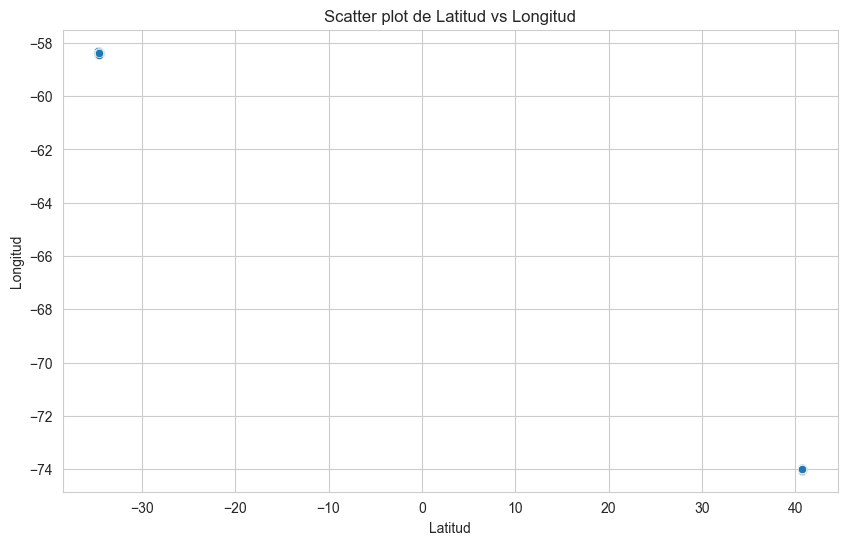

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lat', y='lon')
plt.title('Scatter plot de Latitud vs Longitud')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

Notamos una clara agrupación por zonas geográficas.
#### Aplicamos KMeans para agrupar por zonas y realizamos feature engineering

In [76]:
import pandas as pd

df_raw = pd.read_csv("../data/raw/casas_dev.csv")

df_raw.loc[df_raw['area_units'] == 'sqft', 'area'] = df_raw['area'] * 0.092903
df_raw.loc[df_raw['area_units'] == 'sqft', 'area_units'] = 'm2'

df_raw = df_raw.drop('area_units', axis=1)



In [77]:
from utils.data import process_dataset
from models.clustering.kmeans import KMeans


kmeans = KMeans(n_clusters=2) 

feature_engineering_ops = [
  
    {
        'name': 'area_per_room', 
        'operation': lambda df: df['area'] / df['rooms']
    },
    
    {
        'name': 'pool_house',
        'operation': lambda df: df['has_pool'] * df['is_house']
    },
    
    {
        'name': 'house_area',
        'operation': lambda df: df['area'] * df['is_house']
    }
    

]

# Procesar el dataset
processed = process_dataset(
    df=df_raw,
    kmeans_model=kmeans,  # Asegúrate de tener el modelo kmeans definido
    feature_engineering_ops=feature_engineering_ops,
    features_to_impute=['rooms', 'age'],
    location_columns=['lat', 'lon'],
    impute_by_zone=True,  # Para imputar por zonas como en el código original
    save_path="../data/processed/casas_dev_eng_mean_impute.csv"
)

# Obtener el DataFrame procesado
df_processed = processed['df']
location_data = processed['df_pos']
zone_statistics = processed['zone_stats']
feature_statistics = processed['feature_stats']



Al utilizar estas features, logramos crear clusters que nos permiten agrupar las propiedades por zonas geográficas, y además podemos capturar relaciones entre variables las features que el modelo lineal solo no podría. 

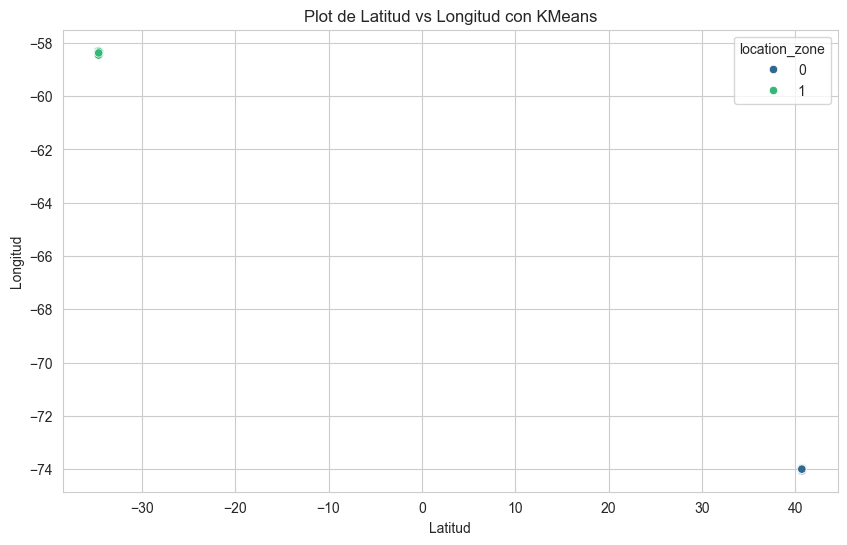

In [78]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=location_data, x='lat', y='lon', hue='location_zone', palette='viridis')
plt.title('Plot de Latitud vs Longitud con KMeans')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()


## Punto 4.2

In [79]:
import numpy as np

df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")
df_imputed = pd.read_csv(r"../data/processed/casas_dev_eng_mean_impute.csv")

results_engineering = train_and_evaluate_model(
    df=df, 
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=np.log,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

model_engineering = results_engineering["model"]


mse_first_model = results_linear_psinv_all["mse"] 
r2_first_model = results_linear_psinv_all["r2"]

mse_engineering = results_engineering["mse"]
r2_engineering = results_engineering["r2"]



In [80]:

# calcular cuanto mejor es el modelo con feature engineering porcentualmente comparado al primer modelo lineal 
improvement_mse = ((mse_first_model - mse_engineering) / mse_first_model) * 100
improvement_r2 = ((r2_engineering - r2_first_model) / r2_first_model) * 100

print(f"El modelo con feature engineering tiene un mejor desempeño en términos de MSE en un {improvement_mse:.4f}%.")
print(f"El modelo con feature engineering tiene un mejor desempeño en términos de R2 en un {improvement_r2:.4f}%.\n")

# mostrar las metricas de ambos modelos

print(f"MSE del primer modelo: {mse_first_model:.4f}")
print(f"R2 del primer modelo: {r2_first_model:.4f}\n")

print(f"MSE del modelo con feature engineering: {mse_engineering:.4f}")
print(f"R2 del modelo con feature engineering: {r2_engineering:.4f}")

El modelo con feature engineering tiene un mejor desempeño en términos de MSE en un 99.9999%.
El modelo con feature engineering tiene un mejor desempeño en términos de R2 en un 8.1844%.

MSE del primer modelo: 11630.1602
R2 del primer modelo: 0.9047

MSE del modelo con feature engineering: 0.0128
R2 del modelo con feature engineering: 0.9788


Observamos que, a comparación del primer modelo lineal entrenado, el modelo utilizando feature engineering tiene un mejor desempeño tanto en términos de MSE como de R2.

Cabe destacar que tomamos el logaritmo de la variable objetivo para que el modelo se ajuste mejor a los datos. Tomar el logaritmo ayuda a que la distribución sea más simétrica porque comprime los valores grandes más que los pequeños, reduciendo la asimetría hacia la derecha (sesgo positivo).


Volviendo al inciso 2, donde mencionabamos que el modelo lineal no era capaz de capturar relaciones y presentaba heterocedasticidad, se prueba a continuación qué sucede si aumentamos el grado de la regresión polinómica, y usamos las nuevas features que creamos.

In [81]:
from utils.model import train_and_evaluate_model
from models.regression.polynomial_regressor import PolynomialRegressor

results_polynomial = train_and_evaluate_model(
    data_path=r"../data/processed/casas_dev_eng.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=PolynomialRegressor.change_degree(4),
    transform_target=np.log,
    normalize_features=True,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

# transormar errores a espacio original

mse_polynomial = results_polynomial["mse"]
r2_polynomial = results_polynomial["r2"]

# sacar escala logaritmica
mse_polynomial = np.exp(mse_polynomial)


print(f"MSE del modelo polinómico: {mse_polynomial:.4f}")
print(f"R2 del modelo polinómico: {r2_polynomial:.4f}")

model_polynomial = results_polynomial["model"]

print(results_polynomial['r2'])

MSE del modelo polinómico: 1.0100
R2 del modelo polinómico: 0.9834
0.9834413248795779


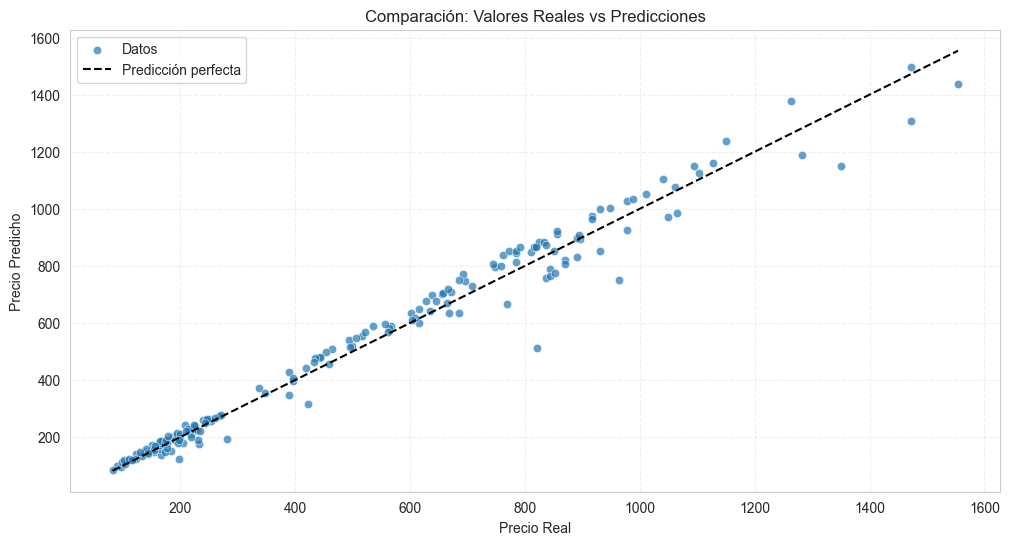

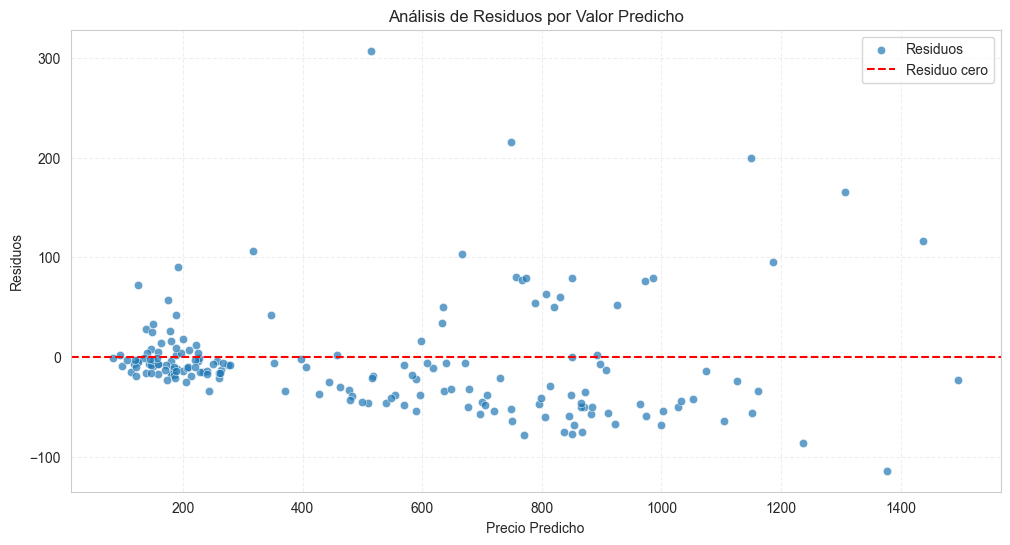

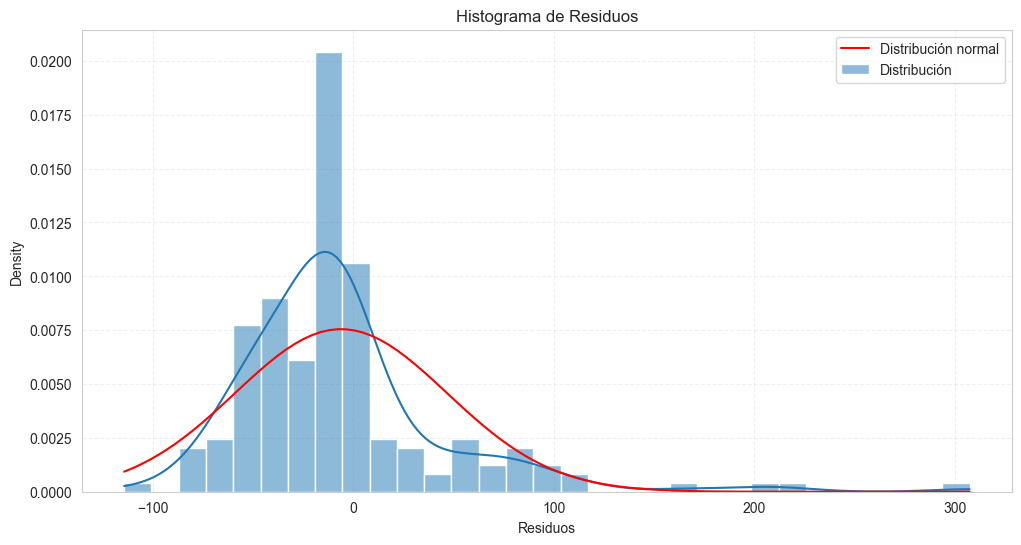

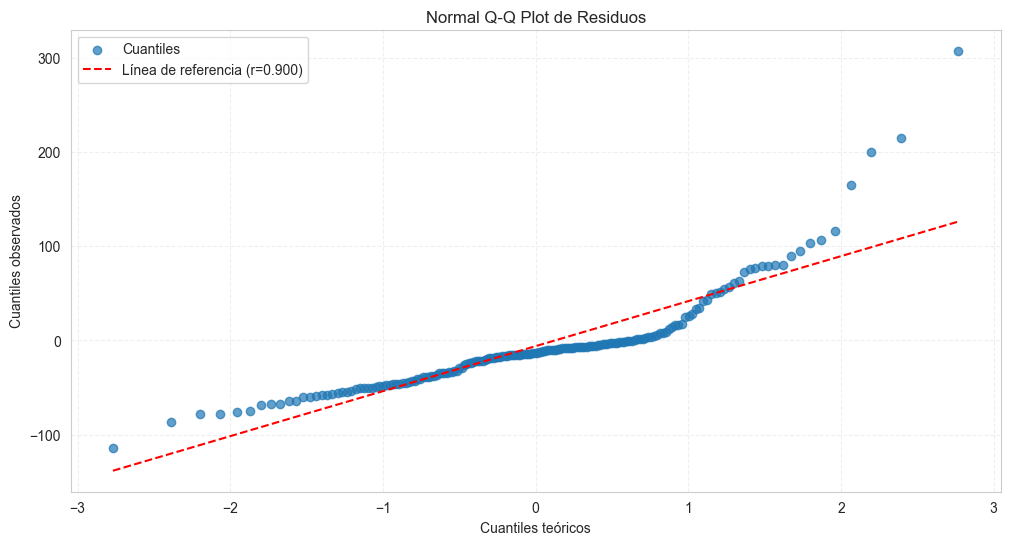

In [82]:
figures_engineering = visualize_regression_results(
    results_polynomial['y_test'],
    results_polynomial['y_pred_test'],
    transform_func=np.exp,
    fig_size=(12, 6),
    titles=custom_titles,
    show_figures=True,
    fit_degree=1
)

Vemos como el modelo polinómico con grado 3 tiene un mejor ajuste que el modelo lineal, y que el modelo con feature engineering.
Se observa, en el Q-Q plot, dos "colas" 

En el grafico de la distirbucion de residuos, observamos que el modelo polinómico tiene una distribución normal con una 'cola' más larga que el modelo lineal, lo que sugiere que el modelo polinómico tiene más errores grandes que el modelo lineal (INTICION, NO SE SI ES ASI).

{'mse': array([0.02082398, 0.01865071, 0.01747019, 0.01552179, 0.01528296,
       0.01529499, 0.01498406, 0.01585621, 0.01798795, 0.02140715]), 'r2': array([0.96425273, 0.9679044 , 0.96993774, 0.97326667, 0.97369168,
       0.97367061, 0.97418641, 0.97271898, 0.96896611, 0.9629878 ])}
{'mse': np.float64(0.014984057706015732), 'r2': np.float64(0.9629878005780137)}
{'mse': np.int64(7), 'r2': np.int64(10)}


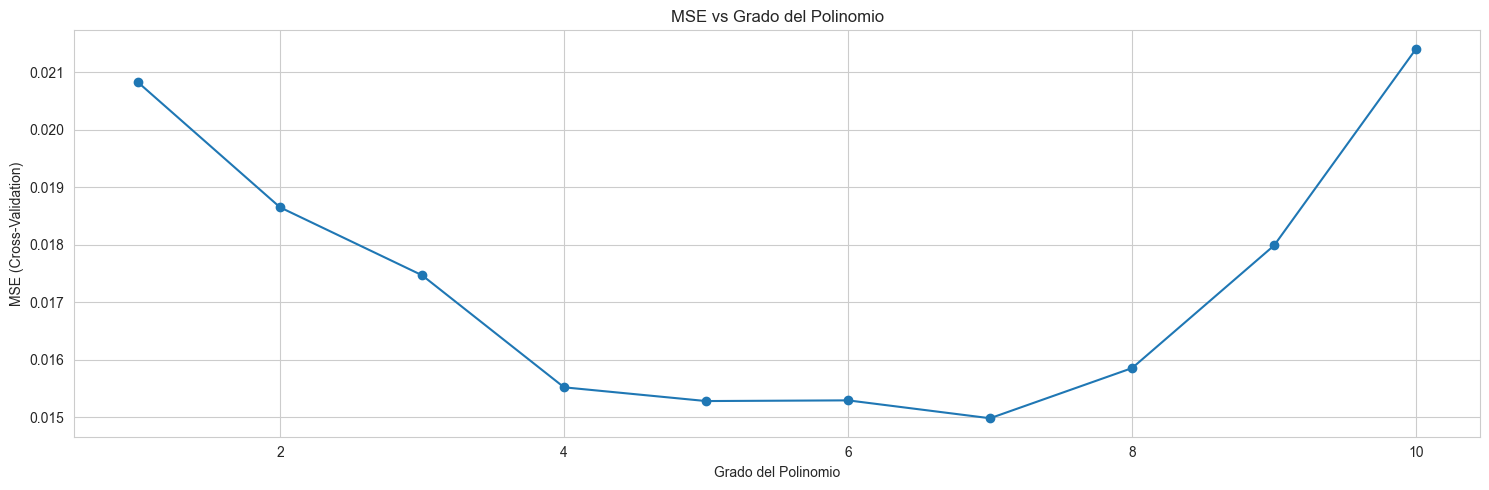

El mejor grado es: {'mse': np.int64(7), 'r2': np.int64(10)}
MSE mínimo (CV): 0.0150


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from models.regression.polynomial_regressor import PolynomialRegressor
from utils.data import cross_validate_lambda
from utils.data import mse_score, r2_score

# Hacer cross validation del grado de polinomio
degrees = np.arange(1, 11, dtype=int)  # Cambiamos linspace por arange para tener enteros

optimal_degree, min_cv_error, cv_error_scores = cross_validate_lambda(
    X, y, 
    degrees, 
    PolynomialRegressor, 
    n_splits=10, 
    method='pseudo_inverse', 
    variable='degree', 
    normalize=True, 
    random_state=12,
    transform_target=np.log,
    metrics=[mse_score, r2_score]
)

print(cv_error_scores)
print(min_cv_error)
print(optimal_degree)


# Crear figura con dos subplots
fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))

# Graficar MSE vs grado
ax1.plot(degrees, cv_error_scores['mse'], 'o-')
ax1.set_xlabel('Grado del Polinomio')
ax1.set_ylabel('MSE (Cross-Validation)')
ax1.set_title('MSE vs Grado del Polinomio')
ax1.grid(True)


plt.tight_layout()
plt.show()

print(f"El mejor grado es: {optimal_degree}")
print(f"MSE mínimo (CV): {min_cv_error['mse']:.4f}")

### Punto 4.3

In [84]:
df = pd.read_csv(r"../data/processed/casas_dev.csv")

df_numeric = df.select_dtypes(include=['float64', 'int64']).columns

feature_ops = []
features_count = 0
powers = range(1, 40)  

for col in df_numeric:
    for power in powers:
        if features_count >= 300:
            break
            
        feature_ops.append({
            'name': f'{col}_power_{power}',
            'operation': lambda df, col=col, power=power: df[col] ** power
        })
        features_count += 1
        
    if features_count >= 300:
        break

# kmeans = KMeans(n_clusters=2)
results = process_dataset(
    df=df,
    kmeans_model=kmeans,
    feature_engineering_ops=feature_ops,
    location_columns=None,
    features_to_impute=['age', 'rooms']
    )

processed_df = results['df']

processed_df.head()

,area,is_house,has_pool,age,price,lat,lon,rooms,area_power_1,area_power_2,...,rooms_power_18,rooms_power_19,rooms_power_20,rooms_power_21,rooms_power_22,rooms_power_23,rooms_power_24,rooms_power_25,rooms_power_26,rooms_power_27
0,58.993405,1,0,18.0,546.0,40.679064,-74.007844,2.0,58.993405,3480.221833,...,2.621440e+05,5.242880e+05,1.048576e+06,2.097152e+06,4.194304e+06,8.388608e+06,1.677722e+07,3.355443e+07,6.710886e+07,1.342177e+08
1,102.007494,0,0,9.0,759.0,40.712839,-73.967750,3.0,102.007494,10405.528832,...,3.874205e+08,1.162261e+09,3.486784e+09,1.046035e+10,3.138106e+10,9.414318e+10,2.824295e+11,8.472886e+11,2.541866e+12,7.625597e+12
2,61.966301,0,0,7.0,464.0,40.669863,-74.029414,2.0,61.966301,3839.822460,...,2.621440e+05,5.242880e+05,1.048576e+06,2.097152e+06,4.194304e+06,8.388608e+06,1.677722e+07,3.355443e+07,6.710886e+07,1.342177e+08
3,127.000000,1,1,16.0,251.0,-34.600437,-58.415266,4.0,127.000000,16129.000000,...,6.871948e+10,2.748779e+11,1.099512e+12,4.398047e+12,1.759219e+13,7.036874e+13,2.814750e+14,1.125900e+15,4.503600e+15,1.801440e+16
4,128.020334,0,0,8.0,963.0,40.722322,-73.983229,4.0,128.020334,16389.205917,...,6.871948e+10,2.748779e+11,1.099512e+12,4.398047e+12,1.759219e+13,7.036874e+13,2.814750e+14,1.125900e+15,4.503600e+15,1.801440e+16


In [85]:

results_300 = train_and_evaluate_model(
    df=processed_df, 
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=np.log,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=[mse_score, r2_score],
    verbose=False
)

mse_300 = results_300["mse"]
r2_300 = results_300["r2"]

print(f"Mean Squared Error: {mse_300:.2f}")
print(f"R2 Score: {r2_300:.2f}")


Mean Squared Error: 35.77
R2 Score: -58.37


Se esperaba que la incorporación masiva de 300 features, generadas como potencias de las variables numéricas originales, empeorara drásticamente el desempeño del modelo. En lugar de aportar información útil, estas transformaciones generan variables altamente correlacionadas y redundantes, lo que conduce a sobreajuste, inestabilidad numérica y problemas de interpretación, haciendo que el modelo ande mal. Los resultados—con un MSE de 35.77, un R² de -58.37 y un MAE de 5.93—confirman que esta estrategia no tiene sentido, ya que agranda la dimensión del problema sin aportar mejoras predictivas, sino que, por el contrario, deteriora significativamente la calidad del modelo.

# Punto 5


## Punto 5.1 - 5.3

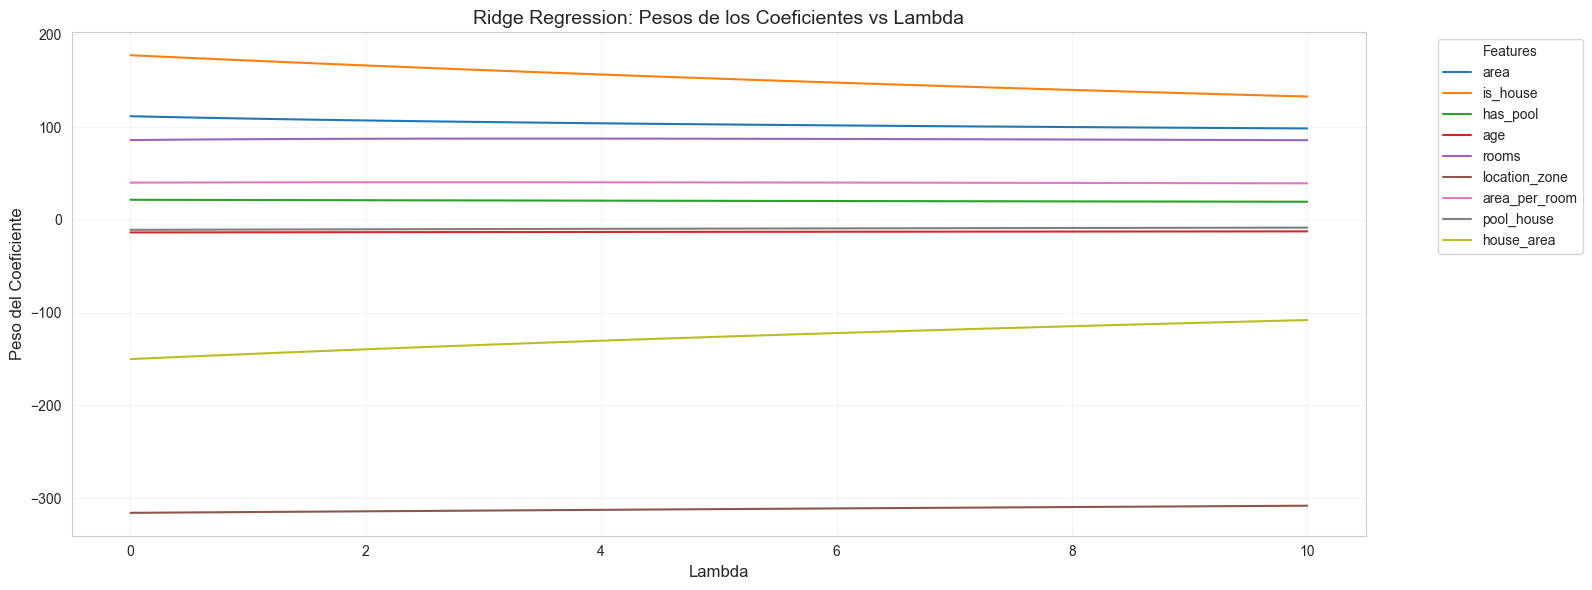

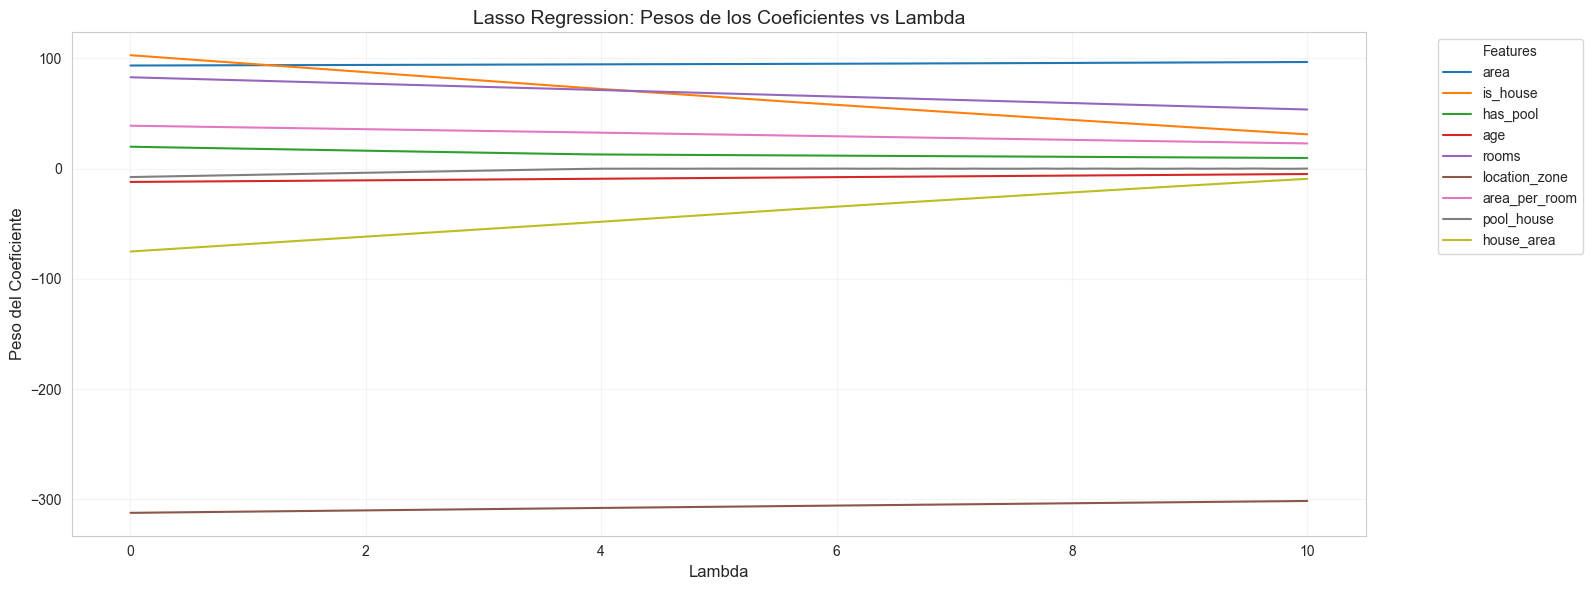

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.regression.linear_regressor import LinearRegressor
from utils.model import get_weights_and_metrics
from utils.visuals import plot_weights_vs_lambda, plot_performance_metrics


df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")

X = df.drop('price', axis=1)
y = df['price']


lambdas = np.linspace(0, 10, 100)


weights_ridge, mse_scores_ridge, r2_scores_ridge = get_weights_and_metrics(X, y, lambdas, LinearRegressor, normalize=True, method='pseudo_inverse', regularization='l2',random_state=12)
weights_lasso, mse_scores_lasso, r2_scores_lasso = get_weights_and_metrics(X, y, lambdas, LinearRegressor, normalize=True, method='gradient_descent', regularization='l1',random_state=12)

feature_names = X.columns


plot_weights_vs_lambda(lambdas, weights_ridge, feature_names,custom_titles={"title": "Ridge Regression: Pesos de los Coeficientes vs Lambda", "xlabel": "Lambda", "ylabel": "Peso del Coeficiente"})
plot_weights_vs_lambda(lambdas, weights_lasso, feature_names,custom_titles={"title": "Lasso Regression: Pesos de los Coeficientes vs Lambda", "xlabel": "Lambda", "ylabel": "Peso del Coeficiente"})




El uso de regularización L1 (Lasso) y L2 (Ridge) tiene efectos distintos en los coeficientes del modelo: Lasso tiende a llevar varios coeficientes exactamente a cero, lo que implica una selección de variables automática y favorece la interpretabilidad del modelo, mientras que Ridge reduce gradualmente la magnitud de todos los coeficientes sin anularlos, distribuyendo el peso entre las variables y haciendo el modelo más estable cuando hay colinealidad. Así, Lasso es útil cuando se busca un modelo más simple y con menos variables relevantes, mientras que Ridge es preferible cuando todas las variables contienen información importante y se quiere evitar sobreajuste sin eliminar ninguna.

## Punto 5.4

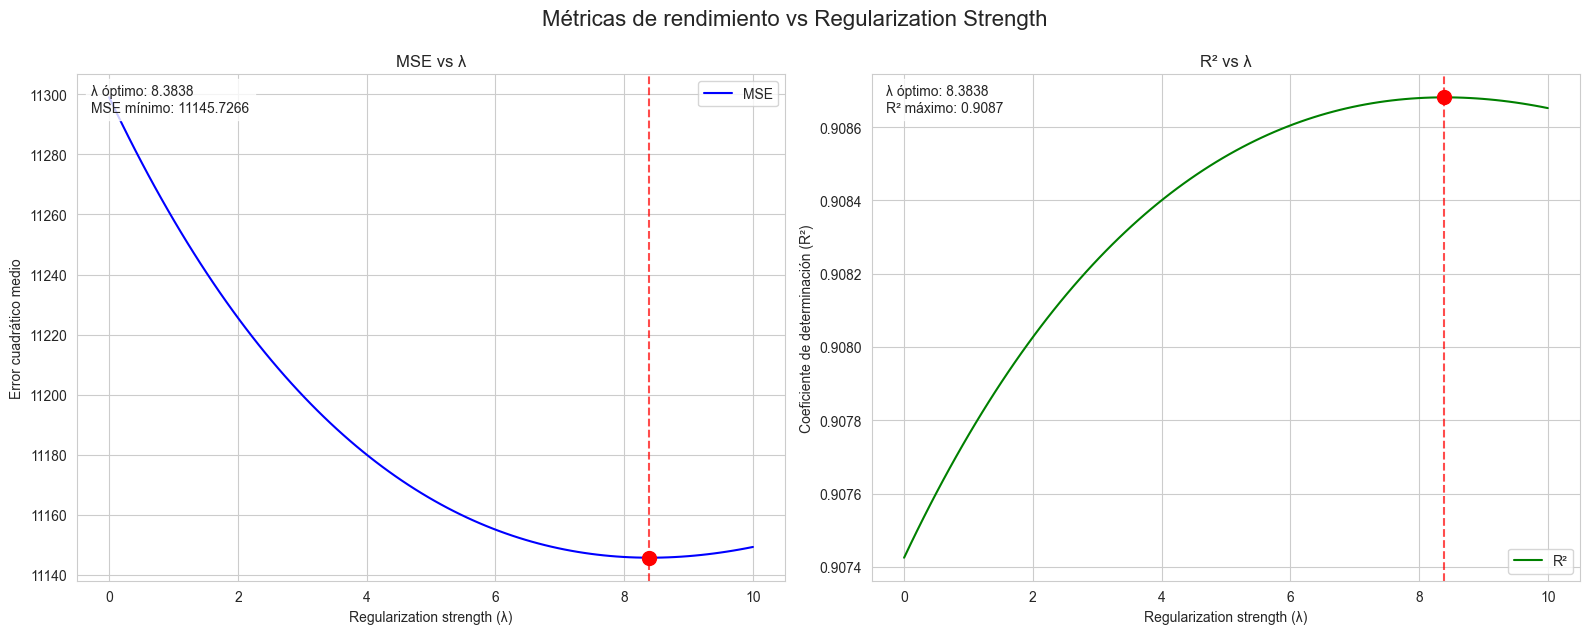

In [87]:
# El mínimo/máximo es el mismo lambda porque...
min_lambda_ridge, min_mse_ridge, max_lambda_ridge, max_r2_ridge = plot_performance_metrics(lambdas, mse_scores_ridge, r2_scores_ridge)


In [88]:
from utils.model import train_and_evaluate_model

df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")    

results_ridge = train_and_evaluate_model(
    df = df,
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse',
                'alpha': min_lambda_ridge,
                'regularization': 'l2'
                },
    metrics=[mse_score, r2_score]
    )




=== Model Evaluation (LinearRegressor) - MSE Space: original ===
mse: 11664.257232
r2: 0.904432
Método: ridge_analytical
Intercept: 56.0858

Coeficientes:
------------------------------
area            | +4.1091
is_house        | +218.5085
has_pool        | +39.9333
age             | -2.4325
rooms           | +56.9265
location_zone   | -587.8357
area_per_room   | +4.7808
pool_house      | -12.4254
house_area      | -1.8217


## Punto 5.6

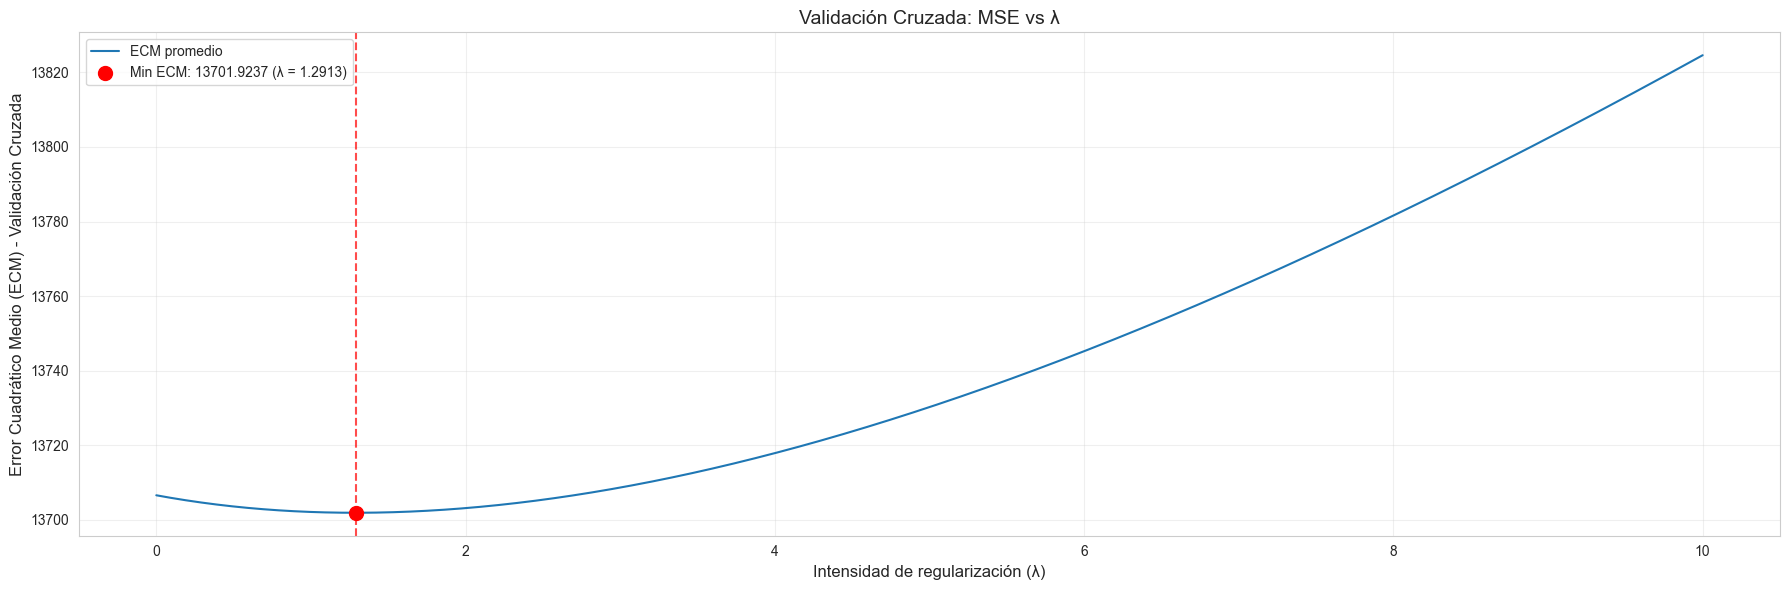

Mejor λ según MSE: 1.291291, MSE mínimo: 13701.923662


In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.regression.linear_regressor import LinearRegressor
from utils.data import cross_validate_lambda, mse_score, r2_score
from utils.visuals import plot_cv_results

df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")
y = df['price']
X = df.drop(columns=['price'])

lambdas = np.linspace(0, 10, 1000)

optimal_lambda, min_cv_error, cv_error_scores = cross_validate_lambda(
    X, y, lambdas, LinearRegressor, n_splits=10, method='pseudo_inverse', 
    regularization='l2', normalize=True, random_state=12,
    metrics=[mse_score],
    variable='penalty'
)

fig, ax1 = plt.subplots(1, 1, figsize=(18, 6))

# Plot para MSE
ax1 = plot_cv_results(
    lambdas, 
    cv_error_scores['mse'], 
    optimal_lambda['mse'], 
    min_cv_error['mse'], 
    title="Validación Cruzada: MSE vs λ",
    ax=ax1
)


plt.tight_layout()
plt.show()

print(f"Mejor λ según MSE: {optimal_lambda['mse']:.6f}, MSE mínimo: {min_cv_error['mse']:.6f}")


# FINAL

In [90]:
df = pd.read_csv(r"../data/raw/casas_test.csv")

df.isna().sum()

area           0
area_units     0
is_house       0
has_pool       0
age           16
price          0
lat            0
lon            0
rooms          4
dtype: int64

In [91]:
# Load the test data
df = pd.read_csv(r"../data/raw/casas_test.csv")

# Apply the same preprocessing steps
df.loc[df['area_units'] == 'sqft', 'area'] = df['area'] * 0.092903
df.loc[df['area_units'] == 'sqft', 'area_units'] = 'm2'
df['location_zone'] = kmeans.predict(df[['lat', 'lon']].to_numpy())

df['area_per_room'] = df['area'] / df['rooms']
df['pool_house'] = df['has_pool'] * df['is_house']

df = df.drop('area_units', axis=1)

# Save the processed test data
df.to_csv(r"../data/processed/casas_test.csv", index=False)


In [92]:
#insertar la media de age y rooms dependiendo de location zone (0 y 1)
df = pd.read_csv(r"../data/processed/casas_test.csv")

df_0 = df[df['location_zone'] == 0]
df_1 = df[df['location_zone'] == 1]


mean_age_0 = df_0['age'].mean()
mean_rooms_0 = df_0['rooms'].mean()

mean_age_1 = df_1['age'].mean()
mean_rooms_1 = df_1['rooms'].mean()

df.loc[df['location_zone'] == 0, 'age'] = df['age'].fillna(mean_age_0)
df.loc[df['location_zone'] == 0, 'rooms'] = df['rooms'].fillna(mean_rooms_0)

df.loc[df['location_zone'] == 1, 'age'] = df['age'].fillna(mean_age_1)
df.loc[df['location_zone'] == 1, 'rooms'] = df['rooms'].fillna(mean_rooms_1)

df = df.drop(['lat', 'lon'], axis=1)

df.to_csv(r"../data/processed/casas_test.csv", index=False)

In [93]:
X_test = df.drop('price', axis=1)


# Get the target variable
y_test = df['price']

# Apply log transformation to match training
y_test = np.log(y_test)

# Make predictions
y_pred_test = model_engineering.predict(X_test)
y_pred_test = np.exp(y_pred_test)  # Inverse transform predictions

# Calculate metrics
r2 = model_engineering.r2_score(X_test, y_test)
print("R² Score:", r2)

ValueError: Número incorrecto de características. Esperado: 10, Recibido: 9